# Dataset Range and Domain Visualizer
What range of input values are present in each dataset? This will help to decide what range of potential values to generate for control purposes.

In [14]:
import sys
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import pearsonr

sys.path.append('..')
from ehd_dataset import EHD_Loader
from ehd_models import EHD_Model


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Dataset_Pkl = "C:/Dropbox/SPEED/Self Driving EHD/Datasets/compiled_data.pickle"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
loader = EHD_Loader(Dataset_Pkl)

print("Datasets Loaded!\n>> Quick correlation validation check -- [auac; vec L2] <<")
for i, df in enumerate(loader.datasets):
    AUAC, _ = pearsonr(df.area,
                       df.wave.apply(lambda x: np.sum(np.abs(x))))
    VL2, _ = pearsonr(df.area,
                       df.vector.apply(lambda x: np.sqrt(np.sum(x**2))))
    print(f"<<{loader.names[i]} -- [{AUAC:.3f}; {VL2:.3f}]", end='>> ')

Failed to load 10-Mar-2022 large nozzle mosaic: 'DataFrame' object has no attribute 'note'
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\29-Mar-2022 lg 1cm 300 points	263 points	offset 2	corr 0.4979414348873561
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 1	121 points	offset 32	corr 0.6417618745477631
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\2-May-2022__run 2	528 points	offset 4	corr 0.6184015138069094
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\23-May-2022_squares	352 points	offset 8	corr 0.5521885646579606
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\24-May-2022 large harmonics	682 points	offset 0	corr 0.5871179189117662
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\8-Aug-2022_lg-square-20um	686 points	offset 1	corr 0.8454268563076222
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\10-Sep-2022_std-square-10um	149 points	offset 16	corr 0.7935638727333442
dataset C:\Dropbox\SPEED\Self Driving EHD\Datasets\10-Sep-2022_std-square-

In [4]:
# Visualize filters for the std-tip square wave experiments
XTYPE = "normed_squares"  # vector, normed_squares, v_normed_squares
YTYPE = "max_width"
FILTERS = [
           ('vector',  lambda x: len(x), 2),
           ('Wavegen', lambda x: x, 'square'),
           ('V Thresh [V] @ .5s', np.isnan, False),
           ('SIJ Tip', lambda x: x, 'Std'),
           ('jetted',  lambda x: x, True),
           ('clogging', lambda x: x, False)
          ]

pretrain_set, eval_set, _ = loader.folded_dataset(fold=0, xtype=XTYPE, ytype=YTYPE, 
                                                  pretrain=True, filters=FILTERS)

df = pd.DataFrame({
    'V': np.concatenate((eval_set['X'][:, 0], pretrain_set['X'][:, 0])),
    'w': np.concatenate((eval_set['X'][:, 1], pretrain_set['X'][:, 1])),
    'p': np.concatenate((eval_set['p'], pretrain_set['p'])).astype(int),
    'max_width': np.concatenate((eval_set['Y'], pretrain_set['Y'])),
})

In [30]:
np.logspace(np.log10(2), 2, num=5)
2, 5, 15, 40, 100

array([  2.        ,   5.3182959 ,  14.14213562,  37.60603093,
       100.        ])

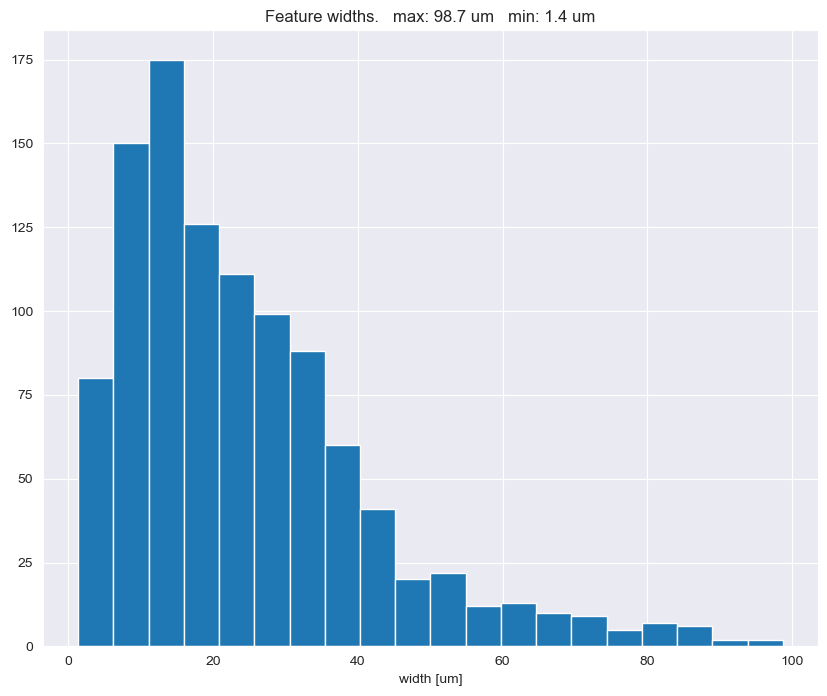

In [25]:
df.max_width.hist(bins=20)
sns.set_style('dark')
plt.title(f"Feature widths.   max: {np.round(df.max_width.max(), 1)} um   min: {np.round(df.max_width.min(), 1)} um")
plt.xlabel("width [um]")
plt.savefig("square wave max_width hist.png")

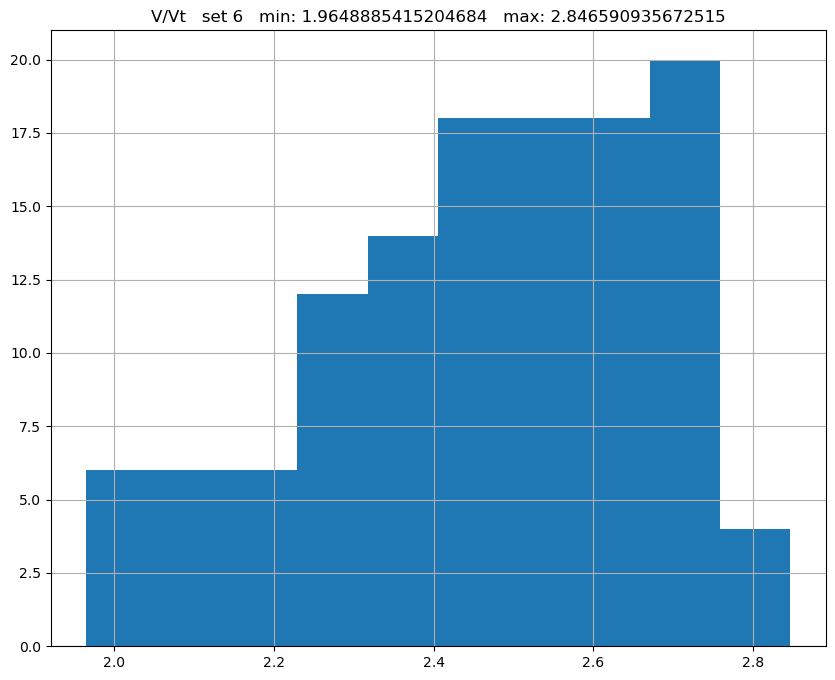

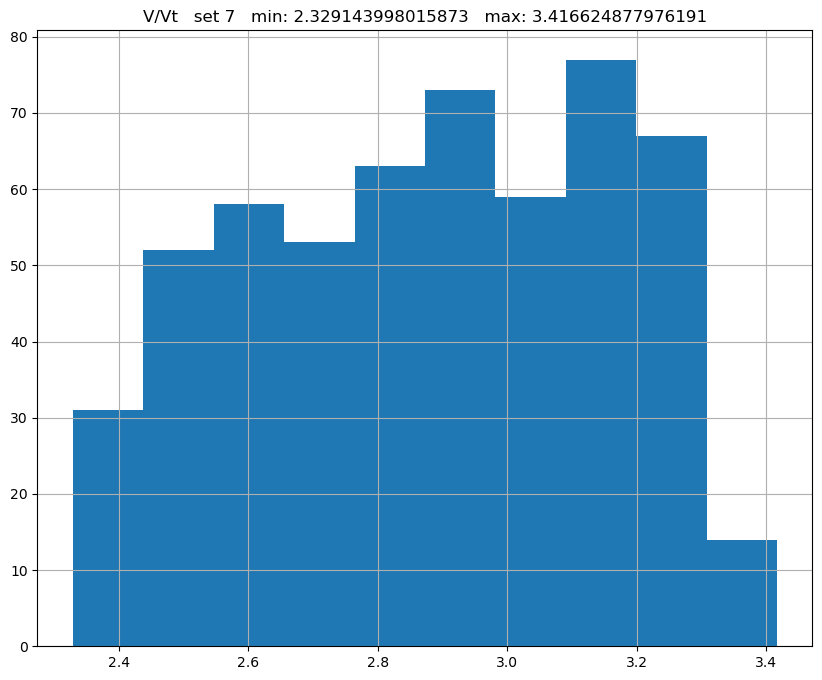

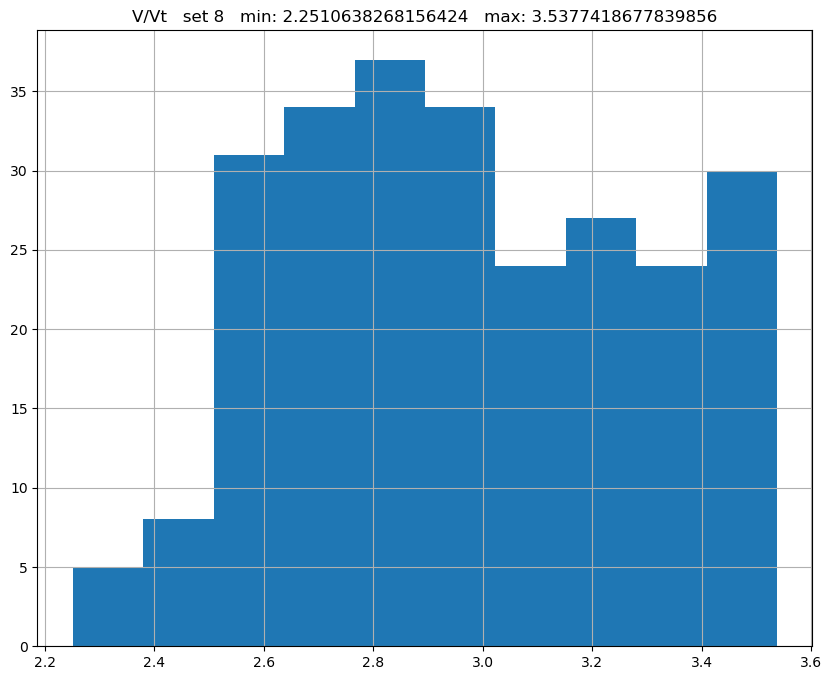

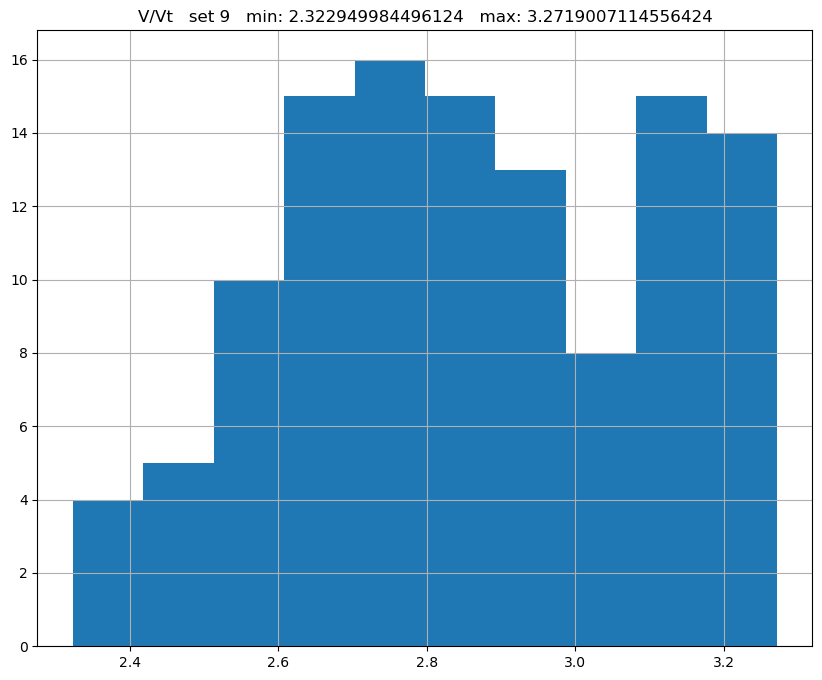

In [5]:
for p in df.p.unique():
    df.V.loc[df.p == p].hist()
    plt.title(f"V/Vt   set {p}   min: {df.V.loc[df.p == p].min()}   max: {df.V.loc[df.p == p].max()}")
    plt.show()

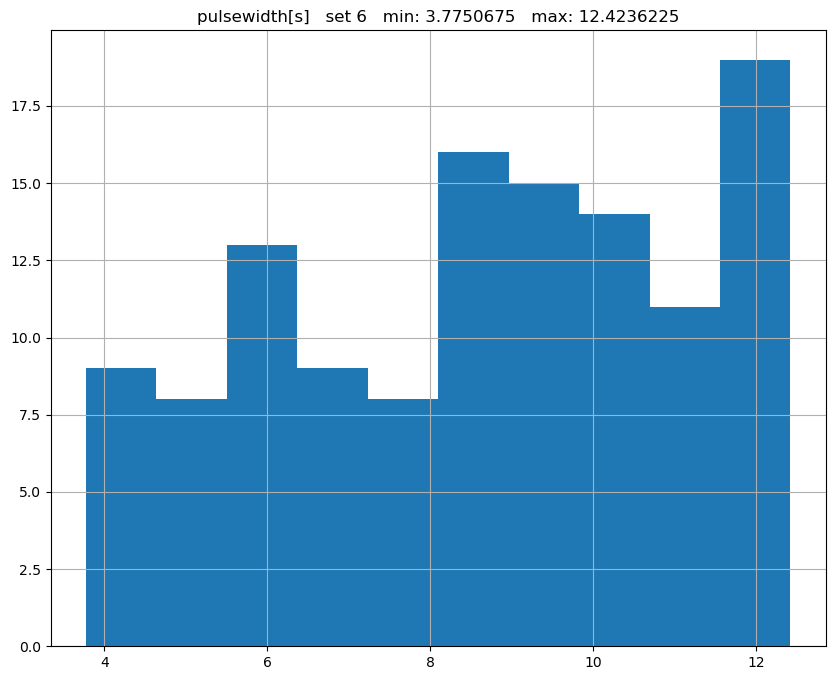

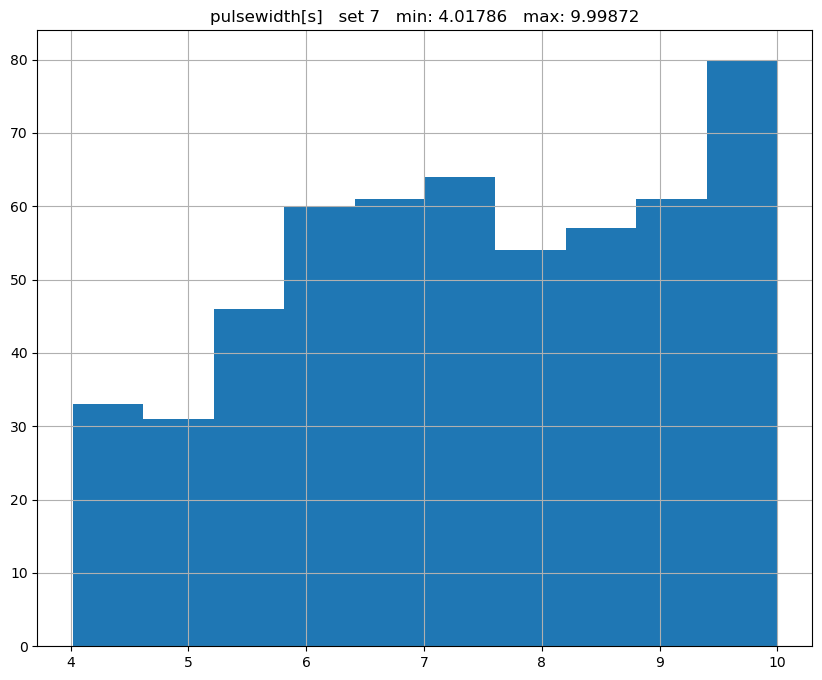

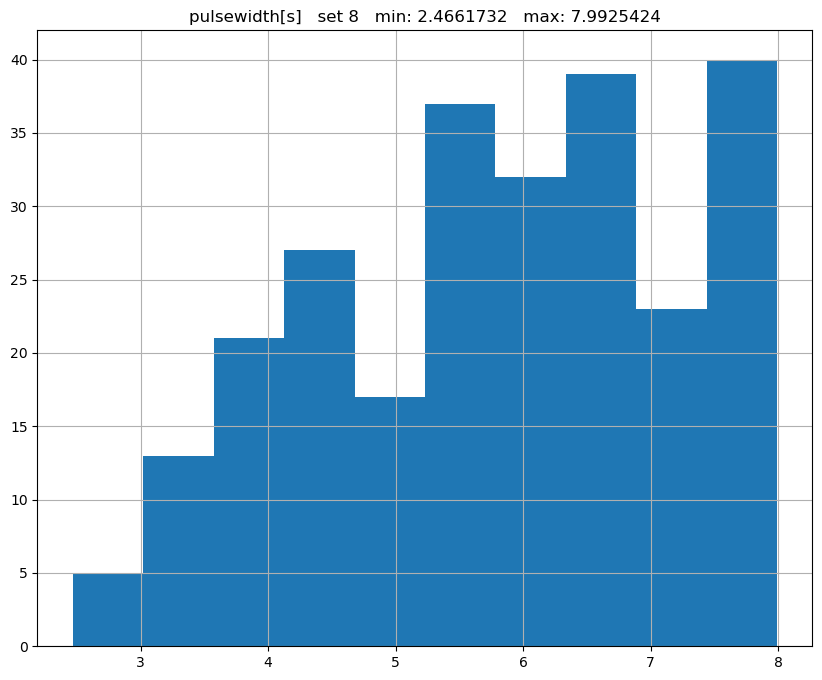

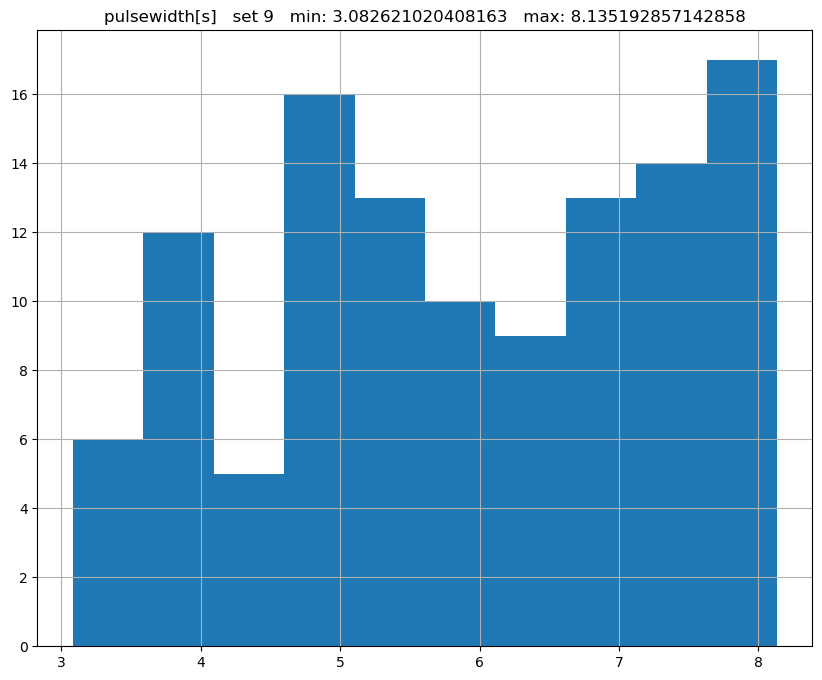

In [7]:
for p in df.p.unique():
    df.w.loc[df.p == p].hist()
    plt.title(f"pulsewidth[s]   set {p}   min: {df.w.loc[df.p == p].min()}   max: {df.w.loc[df.p == p].max()}")
    plt.show()